# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** [Vikri A Haikal]
- **Email:** [vikrianalda@gmail.com]
- **ID Dicoding:** [vikriah16]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
  Bagaimana Distribusi Penyewaan Sepeda berdasarkan Musim?
- Pertanyaan 2
  Bagaimana hubungan antara Temperatur dengan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [ ]:
#Memuat Tabel day
day_df = pd.read_csv('/content/drive/MyDrive/Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Memuat Tabel hour
hour_df = pd.read_csv('/content/drive/MyDrive/Dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### Menilai Data day_df

In [ ]:
#memeriksa tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#menampilkan informasi terkait jumlah missing values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#menampilkan ringkasan parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#####Menilai Data hour_df

In [ ]:
#memeriksa tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#menampilkan informasi terkait jumlah missing values
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#menampilkan ringkasan parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Mengatasi Outlier

In [ ]:
# Mengidentifikasi outlier pada kolom 'cnt' di hour_df
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

# Men-drop baris yang mengandung outlier
outlier_condition = (hour_df['cnt'] < minimum) | (hour_df['cnt'] > maximum)
hour_df_cleaned = hour_df[~outlier_condition]

print("Jumlah data setelah menghapus outlier:", hour_df_cleaned.shape[0])


Jumlah data setelah menghapus outlier: 16874


Mengatasi Duplikat Data

In [ ]:
# Menghapus data duplikat pada day_df
day_df_cleaned = day_df.drop_duplicates()
print("Jumlah data setelah menghapus duplikasi:", day_df_cleaned.shape[0])

Jumlah data setelah menghapus duplikasi: 731


Memeriksa Data yang telah dibersihkan

In [ ]:
# Memeriksa apakah ada missing values setelah pembersihan
print(hour_df_cleaned.isna().sum())
print(day_df_cleaned.isna().sum())

# Memeriksa apakah ada duplikasi setelah pembersihan
print("Jumlah duplikasi pada hour_df_cleaned: ", hour_df_cleaned.duplicated().sum())
print("Jumlah duplikasi pada day_df_cleaned: ", day_df_cleaned.duplicated().sum())

# Memeriksa kembali ringkasan parameter statistik setelah pembersihan
print(hour_df_cleaned.describe())
print(day_df_cleaned.describe())


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi pada hour_df_cleaned:  0
Jumlah duplikasi pada day_df_cleaned:  0
            instant        season            yr          mnth            hr  \
count  16874.000000  16874.000000  16874.000000  16874.000000  16874.000000   
mean    8542.168899      2.490399      0.487733      6.513275     11.458101   
std     5007.766040      1.111966      0.499864      3.462438      6.962144   
min        1.000000      1.000000      0.000000

## Exploratory Data Analysis (EDA)

### Eksplorasi Data untuk DataFrame hour_df



#### Univariate Analysis

In [ ]:
#ANALISIS DESKRIPTIF

# Mean, median, dan standar deviasi
hour_df_cleaned.describe()

# Distribusi kategori
hour_df_cleaned['season'].value_counts()
hour_df_cleaned['weathersit'].value_counts()


weathersit
1    11020
2     4444
3     1407
4        3
Name: count, dtype: int64

##### Visualisasi Data Kuantitatif

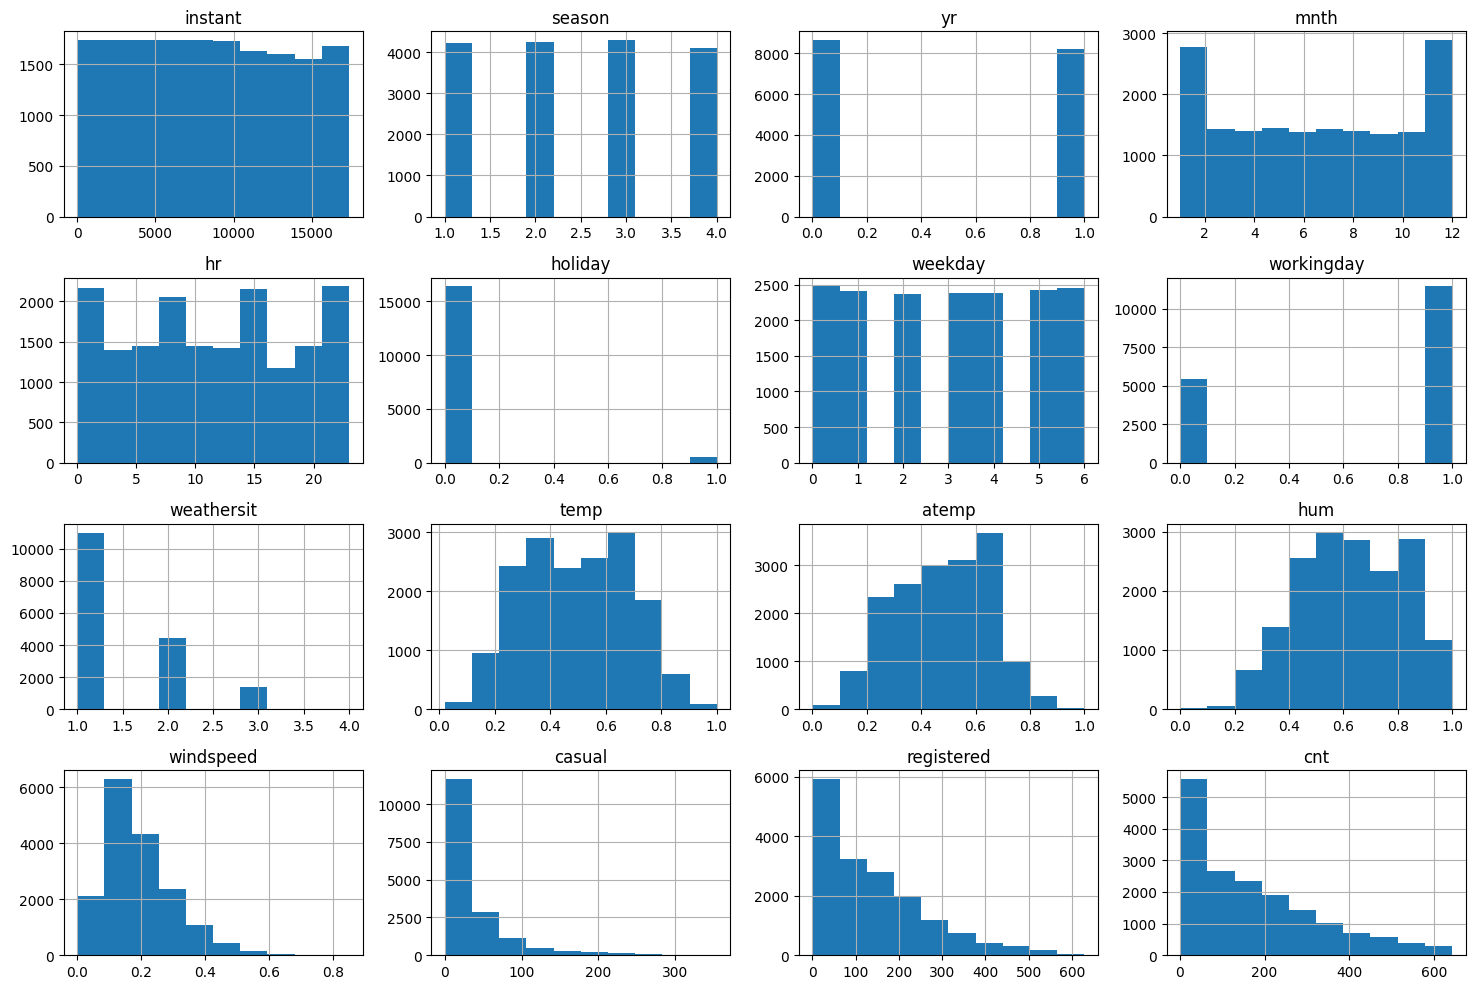

In [ ]:
# Histogram
hour_df_cleaned.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

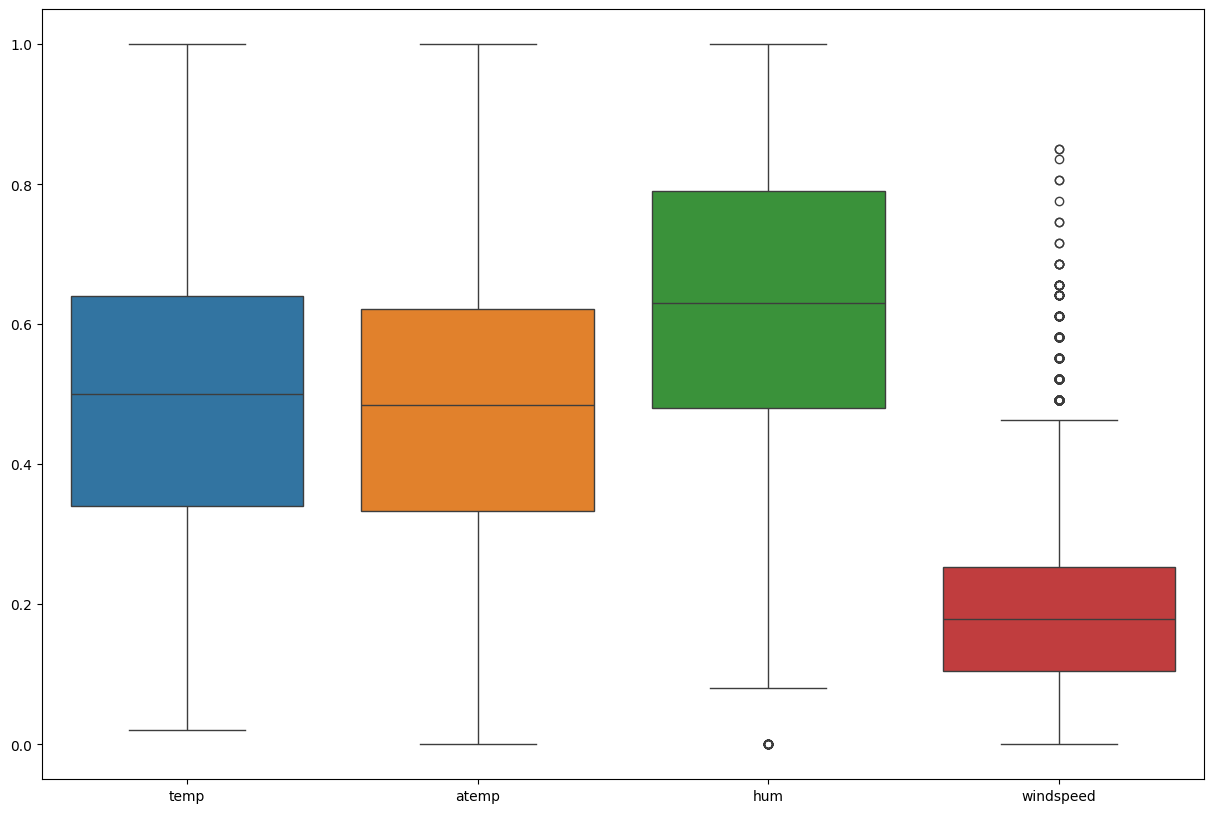

In [ ]:
# Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=hour_df_cleaned[['temp', 'atemp', 'hum', 'windspeed']])
plt.show()

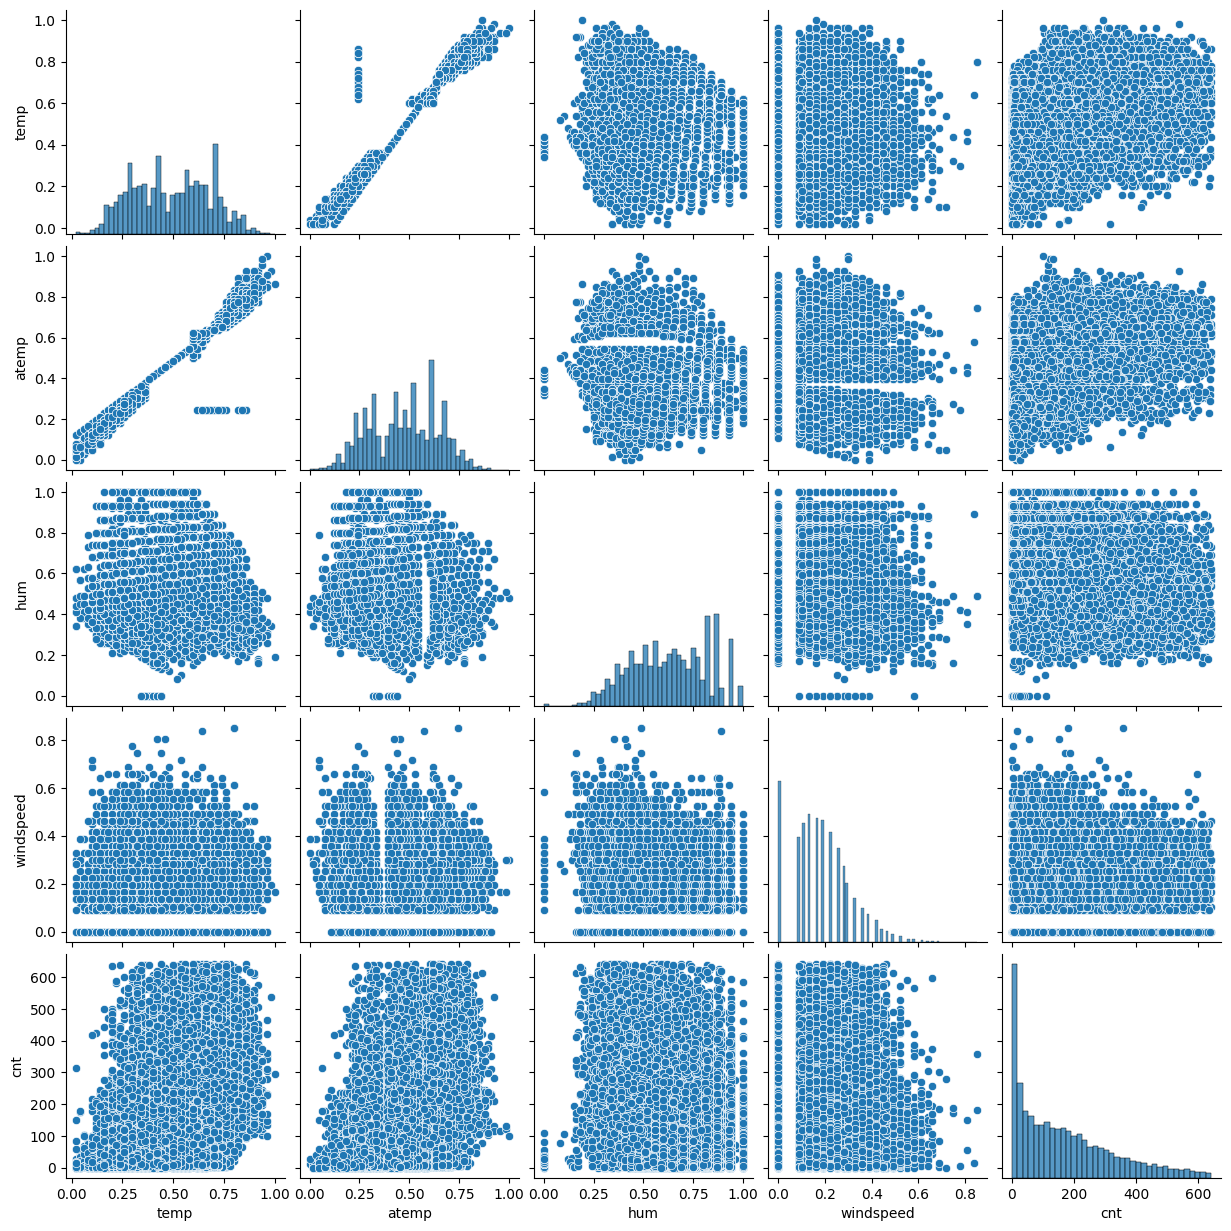

In [ ]:
# Scatterplot
sns.pairplot(hour_df_cleaned[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

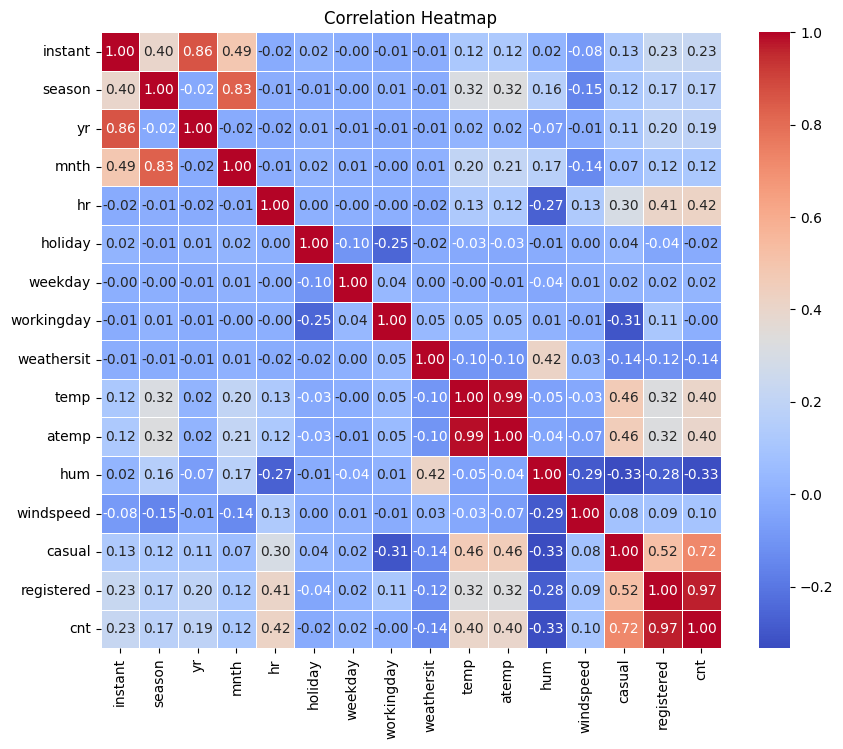

In [ ]:
# Heatmap Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(hour_df_cleaned.drop(columns=['dteday']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

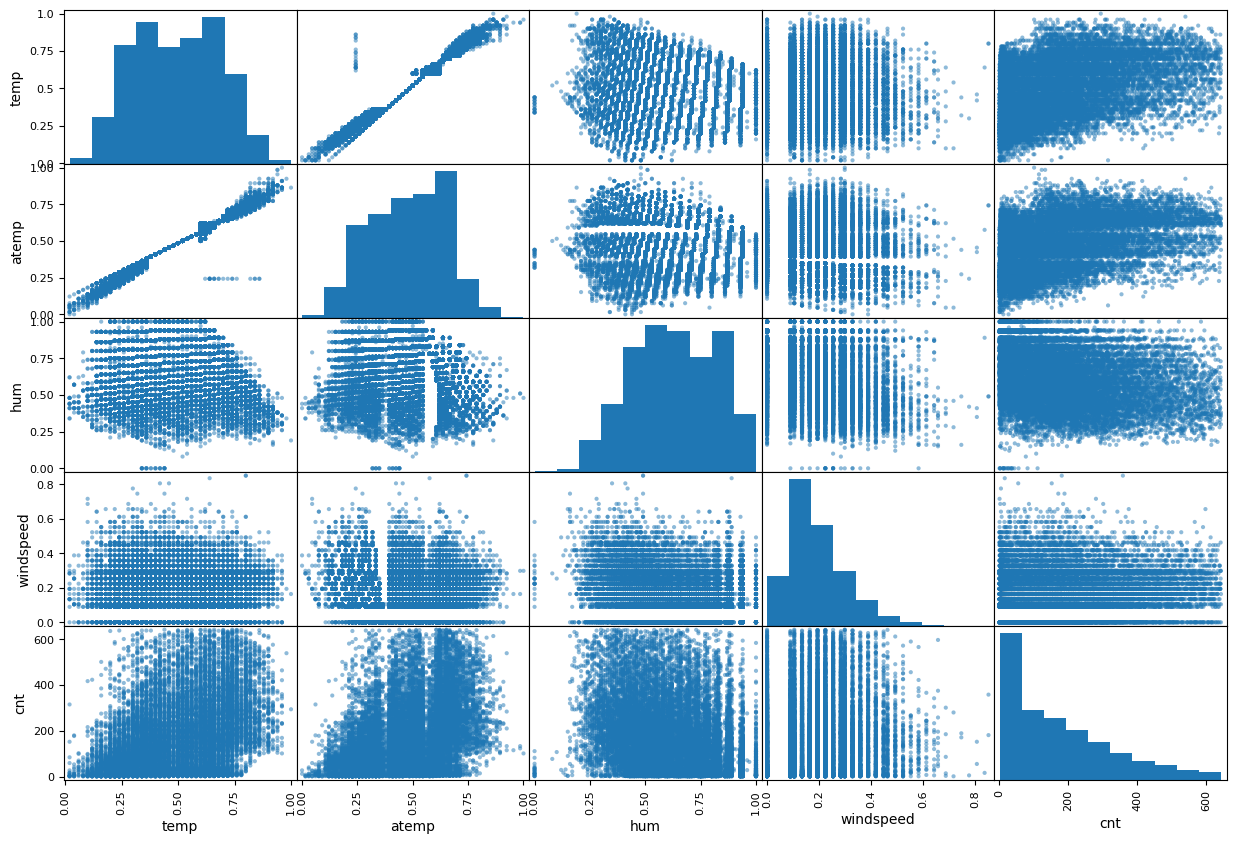

In [ ]:
# Scatter Matrix Plot
pd.plotting.scatter_matrix(hour_df_cleaned[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], figsize=(15, 10))
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

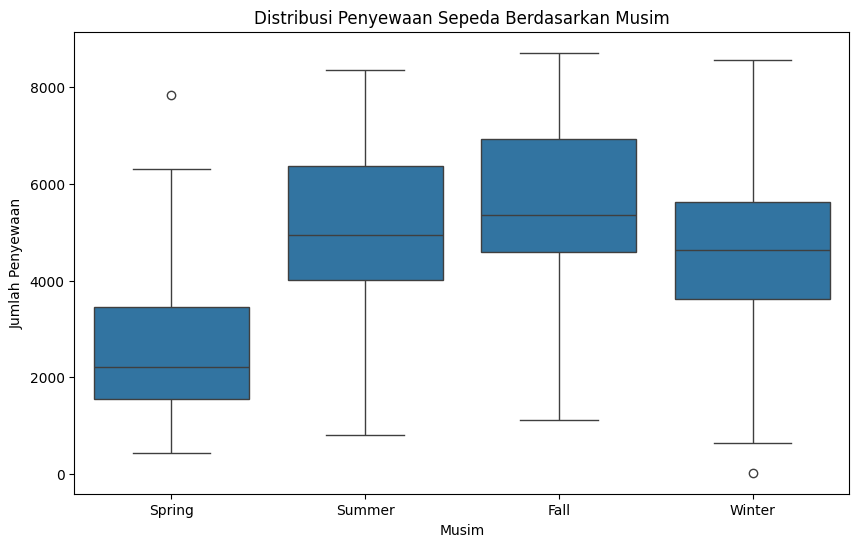

In [ ]:
# Pertanyaan 1: Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda

# Memuat data harian
data_day = pd.read_csv('/content/drive/MyDrive/Dataset/day.csv')

# Plotting box plot untuk melihat distribusi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data_day)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

### Pertanyaan 2:

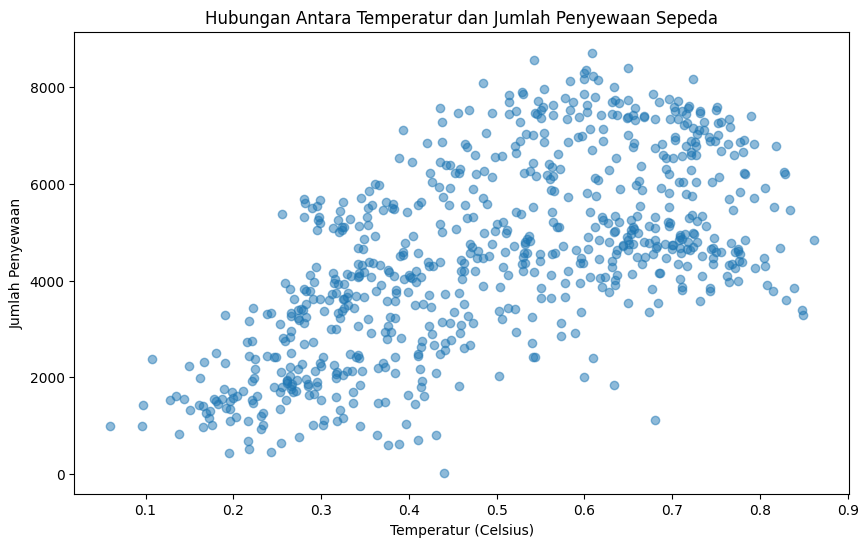

In [ ]:
# Pertanyaan 2: Pola Penggunaan Sepeda berdasarkan Hari dalam Seminggu dan Jam dalam Sehari

# Plotting scatter plot untuk melihat hubungan antara temperatur dan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
plt.scatter(data_day['temp'], data_day['cnt'], alpha=0.5)
plt.title('Hubungan Antara Temperatur dan Jumlah Penyewaan Sepeda')
plt.xlabel('Temperatur (Celsius)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

## Conclusion

- Conclution pertanyaan 1
  Dari analisis yang telah dilakukan terhadap data harian, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam jumlah penyewaan sepeda berdasarkan musim. Musim Summer dan Fall memiliki jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan musim Spring dan Winter. Hal ini mungkin disebabkan oleh kondisi cuaca yang lebih hangat dan kondusif untuk bersepeda pada musim tersebut. Oleh karena itu, faktor musim memiliki pengaruh yang cukup besar terhadap tingkat penyewaan sepeda.


- Conclution pertanyaan 2
  Dari analisis hubungan antara temperatur dan jumlah penyewaan sepeda, dapat disimpulkan bahwa terdapat korelasi positif antara kedua variabel tersebut. Semakin tinggi suhu, semakin tinggi juga jumlah penyewaan sepeda. Hal ini menunjukkan bahwa cuaca yang lebih hangat cenderung meningkatkan minat masyarakat untuk menyewa sepeda. Oleh karena itu, faktor cuaca, khususnya suhu, dapat dijadikan prediktor penting untuk memperkirakan tingkat permintaan penyewaan sepeda di masa mendatang.